# Correlação e gráficos de espalhamento

## Objetivo: Demonstrar graficamente a ideia de correlação, e de gráficos de espalhamento em geral.

In [1]:
import os
import pandas as pd

repo_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
file_patch = os.path.join(repo_dir, "materiais", "survey_results_public.csv")
df = pd.read_csv(file_patch, index_col="ResponseId")
df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_context('notebook')

### O conceito de correlação

Dizemos que duas variáveis A e B são correlacionadas quando o aumento em A está ligado a um aumento em B.

O exemplo clássico é a correlação entre altura e massa: quanto mais alta é a pessoa, maior tende a ser sua massa corporal. Não é necessariamente uma regra fixa (pode haver gente muito alta e muito magra), mas como tendência, é válido.

Uma forma prática de detectar correlações visualmente é com **gráficos de espalhamento**.

Abaixo, temos exemplos de correlações com diferentes intensidades:

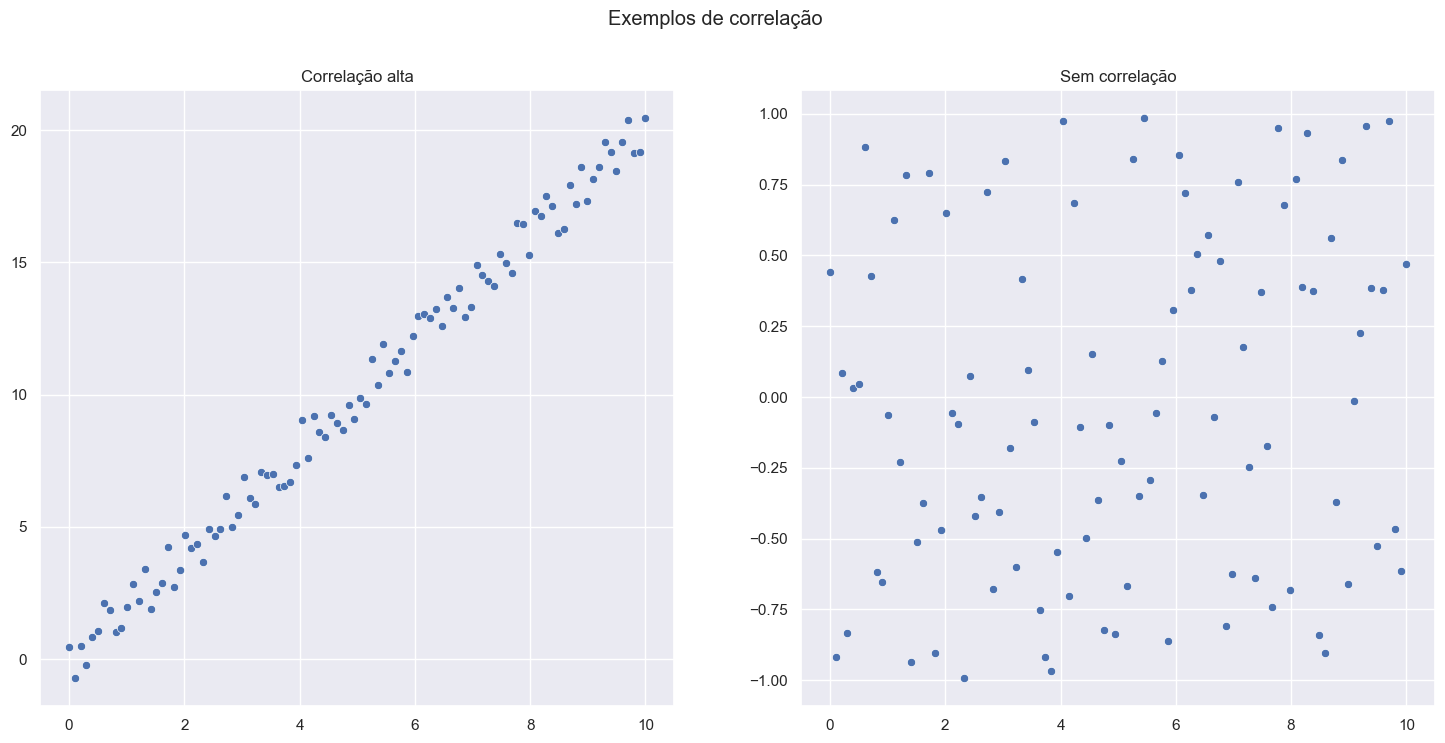

In [3]:
import numpy as np

x = np.linspace(0, 10, 100)
y_random = np.random.uniform(-1, 1, 100)
y_corr = x * 2 + y_random

fig, (ax_esq, ax_dir) = plt.subplots(figsize=(18, 8), ncols=2)

sns.scatterplot(ax=ax_esq, x=x, y=y_corr)
ax_esq.set_title('Correlação alta')

sns.scatterplot(ax=ax_dir, x=x, y=y_random)
ax_dir.set_title('Sem correlação')

fig.suptitle('Exemplos de correlação')
plt.show()

Mais alguns exemplos:

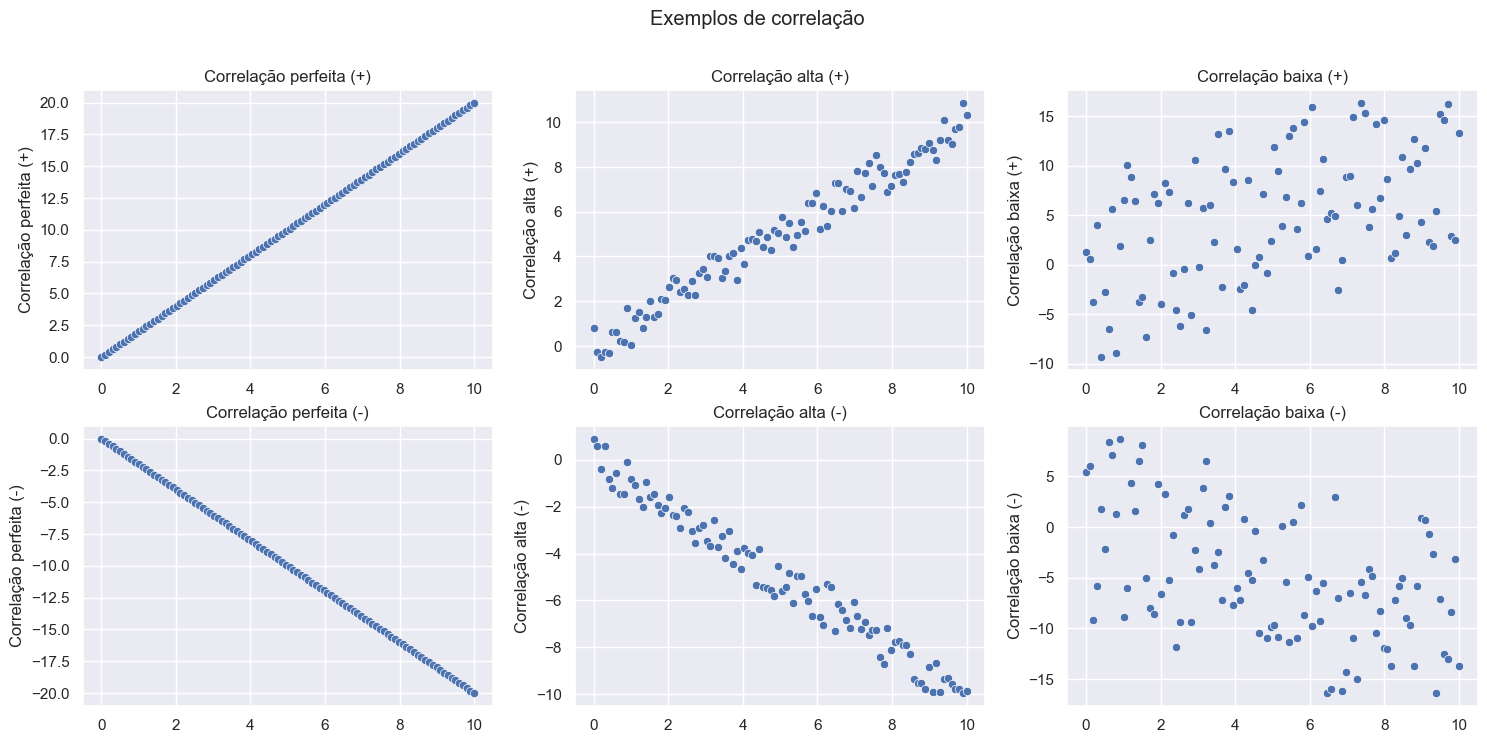

In [4]:
import itertools

x = np.linspace(0, 10, 100)
df_corr = pd.DataFrame({
    'Correlação perfeita (+)': x * 2,
    'Correlação alta (+)': x + np.random.uniform(-1, 1, 100),
    'Correlação baixa (+)': x + np.random.uniform(-10, 10, 100),
    'Correlação perfeita (-)': -x * 2,
    'Correlação alta (-)': -x + np.random.uniform(-1, 1, 100),
    'Correlação baixa (-)': -x + np.random.uniform(-10, 10, 100),
})

fig, axes = plt.subplots(figsize=(18, 8), ncols=3, nrows=2)

for column, ax in zip(df_corr, itertools.chain.from_iterable(axes)):
    y = df_corr[column]
    sns.scatterplot(ax=ax, x=x, y=y)
    ax.set_title(column)

fig.suptitle('Exemplos de correlação')
plt.show()

Importante: correlação é meramente um vínculo matemático. Não implica necessariamente causa e efeito!

Por exemplo: Ter mais de um banheiro em casa está correlacionado a uma renda mais alta. Isso não significa que meu salário vai aumentar se eu construir um novo banheiro!

### Medindo correlação

Podemos medir a "força" da correlação utilizando o coeficiente de correlação de pearson, também conhecido como `r`. Para isso, podemos utilizar a função `pearsonr` do módulo `scipy.stats`:

In [5]:
from scipy.stats import pearsonr

for column in df_corr:
    r, _ = pearsonr(x, df_corr[column])
    print(f'A correlação entre X e coluna {column} é {r:.3f}')

A correlação entre X e coluna Correlação perfeita (+) é 1.000
A correlação entre X e coluna Correlação alta (+) é 0.983
A correlação entre X e coluna Correlação baixa (+) é 0.475
A correlação entre X e coluna Correlação perfeita (-) é -1.000
A correlação entre X e coluna Correlação alta (-) é -0.983
A correlação entre X e coluna Correlação baixa (-) é -0.517


Como podemos ver, a correlação varia entre -1 e 1, onde:
- 1  -> correlação positiva perfeita
- 0  -> sem correlação
- -1 -> correlação negativa perfeita

Valores intermediários de correlação representam uma correlação fraca a moderada (seja ela positiva ou negativa).

### Correlação em um DataFrame

Se tivermos um DataFrame, não precisamos ficar testando correlações coluna a coluna.

No lugar disso, podemos usar `df.corr()` para medir a correlação entre todas as colunas de uma só vez:

In [6]:
sample = pd.DataFrame({
    'x': [10, 5, 2],
    'y': [9, 8, 9],
    'z': [4, 4, 7],
})
df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [7]:
sample.corr()

,x,y,z
x,1.000000,0.142857,-0.785714
y,0.142857,1.000000,0.500000
z,-0.785714,0.500000,1.000000


Uma forma prática de visualizar correlações neste caso é usando um heatmap - uma espécie de "mapa" onde cada quadrante representa a força da correlação entre variáveis:

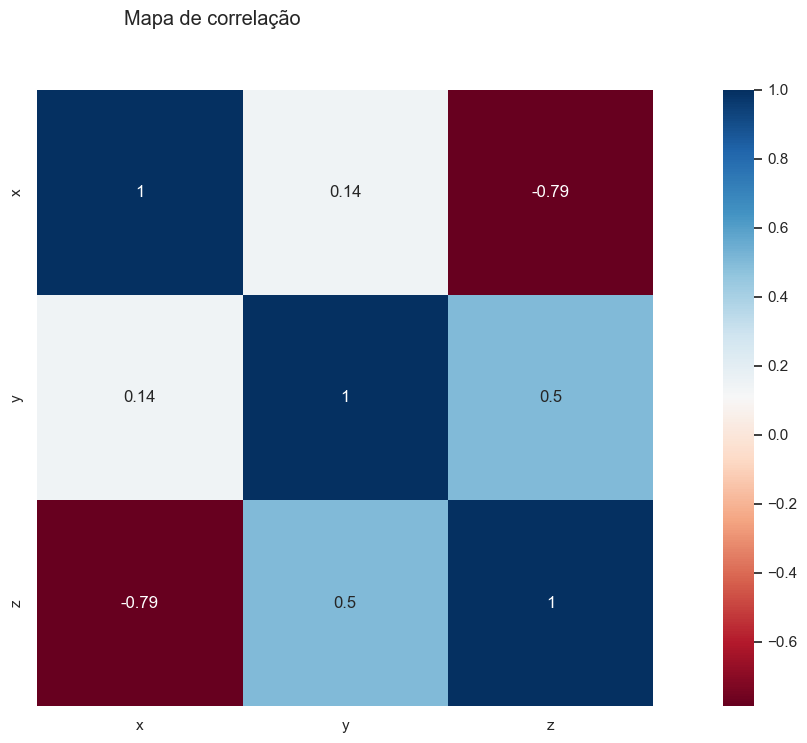

In [8]:
fig, axes = plt.subplots(figsize=(18, 8))

sns.heatmap(data=sample.corr(), square=True, cmap='RdBu', annot=True)

fig.suptitle('Mapa de correlação')
plt.show()

O mapa de correlação deixa claro os pontos de maior/menor correlação, de uma forma visual.